# Phase 2 Project Office Hours - Jan 20

Woo py files!

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot
# import eli5

In [3]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# filling all null values with zero
df = df.fillna(value=0)

## First Model

In [8]:
# define columns to use
used_cols = [c for c in df.columns.to_list() if c not in [
    'price', 'id', 'date', 'view', 'sqft_above', 'sqft_basement',
    'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
            ]

In [9]:
# define X and y
X = df[used_cols]
X.info()

y = df['price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  int64  
 3   sqft_lot     21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   waterfront   21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
 8   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42)

In [11]:
# scale
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# model
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_train_preds = lr.predict(X_train_scaled)
y_test_preds = lr.predict(X_test_scaled)

In [13]:
#evaluate

print(f"Train R2: {r2_score(y_train, y_train_preds):.3f}")
print(f"Test R2: {r2_score(y_test, y_test_preds):.3f}")
print("---")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_preds):.3f}")
print(f"Test MAE: {mean_absolute_error(y_test, y_test_preds):.3f}")
print("---")
print(f"Train RMSE: {mean_squared_error(y_train, y_train_preds, squared=False):.3f}")
print(f"Test RMSE: {mean_squared_error(y_test, y_test_preds, squared=False):.3f}")

Train R2: 0.653
Test R2: 0.628
---
Train MAE: 141855.413
Test MAE: 142792.692
---
Train RMSE: 217919.750
Test RMSE: 220395.655


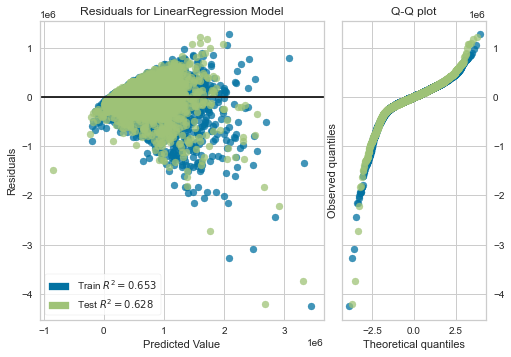

In [14]:
# evaluate residuals
visualizer = ResidualsPlot(lr, hist=False, qqplot=True)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()                        # Finalize and render the figure

In [ ]:
# without yellowbrick:

# plt.scatter(y_train_pred, residuals_train, alpha=.75)
# plt.scatter(y_test_pred, residuals_test, color='g', alpha=.75)

# plt.axhline(y=0, color='black')

# plt.title('Residuals for Linear Regression Model')
# plt.ylabel('Residuals')
# plt.xlabel('Predicted Values')

In [ ]:
# check feature importance
eli5.show_weights(lr, feature_names=used_cols)

In [ ]:
# without eli5:

# print(f"Intercept: {lr.intercept_}")
# dict(zip(X.columns, lr.coef_))

# Functions!

In [16]:
def evaluate_model(y_train, y_test, y_train_preds, y_test_preds):
    """Explanation
    --
    Inputs:
    - y_train
    - y_test
    - y_train_preds
    - y_test_preds
    
    No outputs"""
    print(f"Train R2: {r2_score(y_train, y_train_preds):.3f}")
    print(f"Test R2: {r2_score(y_test, y_test_preds):.3f}")
    print("---")
    print(f"Train MAE: {mean_absolute_error(y_train, y_train_preds):.3f}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_test_preds):.3f}")
    print("---")
    print(f"Train RMSE: {mean_squared_error(y_train, y_train_preds, squared=False):.3f}")
    print(f"Test RMSE: {mean_squared_error(y_test, y_test_preds, squared=False):.3f}")